In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [22]:
df = pd.read_csv('Amreli NRM data for model building.csv')

In [23]:
#Creating new df for modeling by removing the first heat of each campaign

campaign = np.unique(df['campaign'])

for c in campaign:
    dfc = df[df['campaign']==c]
    i = dfc.index[0]
    df = df.drop(i)

In [24]:
df = df.reset_index(drop=True)
df['Number of capacitors removed'].fillna(0, inplace=True)

In [25]:
input_columns = ['Previous Voltage', 'Previous Frequency',
       'Refractory lining before heating', 'Number of capacitors removed']

output_columns = ['Voltage']

In [26]:
X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
print("Train score is {}".format(mean_squared_error(y_train, y_pred_train)))
print("Test score is {}".format(mean_squared_error(y_test, y_pred_test)))
print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train-y_train))/np.sum(np.square(y_train-np.mean(y_train)))*100))
print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test-y_test))/np.sum(np.square(y_test-np.mean(y_test)))*100))
print('R-squared is {}'.format(r2_score(y_test, y_pred_test)))

Train score is 5795.678355602583
Test score is 5643.292708631152
Train NMSE score is 21.16276965096353
Test NMSE score is 16.61080615688094
R-squared is 0.8338919384311906


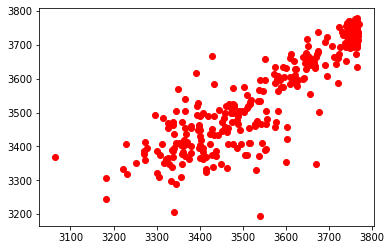

In [10]:
plt.plot(y_train,y_pred_train,'ro')

# Building Model 1 

In [12]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Previous Voltage', 
                 'Previous Frequency','Previous Rating of the Furnace', 'Refractory lining before heating',
                'Number of capacitors removed','Tapping Temperature (C)']
output_columns = ['Efficiency (MT/KWH)','Total Heat Time (minutes)','Voltage','Frequency']

In [54]:
X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
normalized_X_train = scaler.fit_transform(X_train)
normalized_X_test = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(normalized_X_train, y_train)
y_pred_train = lr.predict(normalized_X_train)
y_pred_test = lr.predict(normalized_X_test)

print("Mean Squared error on train data is {}".format(mean_squared_error(y_train, y_pred_train)))
print("Mean Squared error on test data is {}".format(mean_squared_error(y_test, y_pred_test)))

print("R2 score is {}".format(r2_score(y_test, y_pred_test)))

['Scrap (MT)',
 'Sponge (MT)',
 'Hot Heel (MT)',
 'Alloys (MT)',
 'Previous Voltage',
 'Previous Frequency',
 'Previous Rating of the Furnace',
 'Refractory lining before heating',
 'Number of capacitors removed',
 'Tapping Temperature (C)',
 'Efficiency (MT/KWH)',
 'Total Heat Time (minutes)',
 'Voltage',
 'Frequency']

In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
cols = input_columns+output_columns
all_data = df[cols]
all_data_train = all_data.iloc[:318,:].values
all_data_test = all_data.iloc[318:,:].values
scaler = preprocessing.MinMaxScaler()
all_data_train_normalized = scaler.fit_transform(all_data_train)
all_data_test_normalized = scaler.transform(all_data_test)

In [51]:
normalized_X_train = []
for i in range(318):
    normalized_X_train.append(all_data_train_normalized[i][:10])
normalized_X_train = np.array(normalized_X_train)
normalized_X_train = normalized_X_train.reshape(318,10)

normalized_X_test = []
for i in range(np.shape(all_data_test_normalized)[0]):
    normalized_X_test.append(all_data_test_normalized[i][:10])
normalized_X_test = np.array(normalized_X_test)
normalized_X_test = normalized_X_test.reshape(np.shape(all_data_test_normalized)[0],10)

normalized_y_train = []
for i in range(318):
    normalized_y_train.append(all_data_train_normalized[i][10:])
normalized_y_train = np.array(normalized_y_train)
normalized_y_train = normalized_y_train.reshape(318,4)

normailized_y_test = []
for i in range(np.shape(all_data_test_normalized)[0]):
    normailized_y_test.append(all_data_test_normalized[i][10:])
normailized_y_test = np.array(normailized_y_test)
normailized_y_test = normailized_y_test.reshape(122,4)

In [75]:
lr = LinearRegression()
lr.fit(normalized_X_train, normalized_y_train)
y_pred_train = lr.predict(normalized_X_train)
y_pred_test = lr.predict(normalized_X_test)

In [76]:
train_data_and_predicted = []
for i in range(318):
    train_data_and_predicted.append(list(normalized_X_train[i])+list(y_pred_train[i]))
train_data_and_predicted = np.array(train_data_and_predicted)
train_data_and_predicted_inverse = scaler.inverse_transform(train_data_and_predicted)

pred_train = []
for i in range(318):
    pred_train.append(train_data_and_predicted_inverse[i][10:])
pred_train = np.array(pred_train)
pred_train = pred_train.reshape(318,4)


test_data_and_predicted = []
for i in range(122):
    test_data_and_predicted.append(list(normalized_X_test[i])+list(y_pred_test[i]))
test_data_and_predicted = np.array(test_data_and_predicted)
test_data_and_predicted_inverse = scaler.inverse_transform(test_data_and_predicted)


pred_test = []
for i in range(122):
    pred_test.append(test_data_and_predicted_inverse[i][10:])
pred_test = np.array(pred_test)
pred_test = pred_test.reshape(122,4)

In [77]:
r2_score(y_test, pred_test)

0.3790666273646529

In [17]:
df['col'][0]

'name'